In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns; sns.set()
import numpy as np

from sys import platform as _platform

if _platform =='linux2':
    path = '../data/data_sleep/' 
else:
    #mets ton path ici et ça devrait marcher :)
    path = ""

In [2]:
train=pd.read_csv(path+"input_train.csv")
#test=pd.read_csv(path+"input_test.csv")
labels=pd.read_csv(path+"challenge_output_data_training_file_sleep_stages_classification.csv", sep=";")

In [3]:
def filt(y,low, high, freq): 
    filter_array = [i for i,f in enumerate(freq) if f>=low and f<=high]
    return np.array([y[i] for i in filter_array])

In [10]:
import re 
def make_eeg_features(train, low, high):
    fs = 250 # in Hz
    N = fs * 15
    train_eeg = train.filter(regex='EEG[0-9]*').values
    X_fft = np.fft.fft(train_eeg)
    freq = np.fft.fftfreq(N, 1./fs)
    filtered_freq = filt(freq,low,high,freq)
    X_fft = np.apply_along_axis(lambda x: filt(x,low,high,freq), 1 , 1./N * abs(X_fft))
    X_fft = pd.DataFrame(X_fft, columns= ["freq"+str(f) for f in filtered_freq])
    return X_fft

In [11]:
X_fft = make_eeg_features(train, 0.4, 50)

In [12]:
X_fft.describe()

,freq0.4,freq0.466666666667,freq0.533333333333,freq0.6,freq0.666666666667,freq0.733333333333,freq0.8,freq0.866666666667,freq0.933333333333,freq1.0,...,freq49.4,freq49.4666666667,freq49.5333333333,freq49.6,freq49.6666666667,freq49.7333333333,freq49.8,freq49.8666666667,freq49.9333333333,freq50.0
count,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,...,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000
mean,16776.348217,16100.630361,13937.220136,11824.280347,10472.765116,9408.947620,8711.268517,8017.633229,7304.589683,6819.251643,...,135.323298,124.151070,102.377466,74.701277,53.316417,42.007891,38.406734,38.455272,40.827941,46.359333
std,69545.505110,72788.437832,68112.423240,61614.766516,55729.389600,50706.448742,46381.023464,42812.545876,39746.034049,37128.048247,...,801.089552,751.370461,606.624615,390.816544,215.366864,125.926355,107.553060,117.092575,143.228049,197.593242
min,23.135050,11.130458,19.162222,10.771932,28.395171,59.197193,29.012560,38.085718,13.171886,28.686387,...,0.417629,0.585124,0.356990,0.142902,0.221684,0.085714,0.111589,0.095803,0.096350,0.145560
25%,2923.257889,3238.908792,3143.286595,2971.086108,2855.934100,2716.092193,2666.861606,2462.871172,2299.794126,2103.048672,...,43.581935,37.558099,30.763787,22.156544,15.437577,11.560521,9.895396,9.465352,9.364578,9.469083
50%,6424.629109,6984.989138,6721.720305,6197.035999,5946.403236,5600.833683,5452.128996,5109.791883,4579.347754,4390.845738,...,76.526784,67.038860,54.686735,39.937566,27.602238,20.939369,18.084011,17.295247,17.153355,17.375431
75%,17327.203237,16894.444761,14489.165249,13432.203410,12361.979115,11513.597903,10934.367873,10301.762543,9215.852325,8813.776731,...,129.775501,116.715092,94.662957,70.498775,50.146932,38.869061,34.436826,33.029188,32.810106,33.321539
max,11377144.115170,12157273.966578,11533863.116452,10559715.541251,9598191.734300,8771203.472949,8037708.191840,7426763.468023,6900594.757728,6451013.401479,...,125971.198514,109714.692253,84202.147557,52208.660819,26649.899791,10959.261281,3973.255581,4254.340098,4446.810256,5810.242578


In [13]:
train.describe()

,SLEEPER_ID,SIGNAL_ID,IDX_IN_NIGHT,EEG,EEG.1,EEG.2,EEG.3,EEG.4,EEG.5,EEG.6,...,ACC_Z.140,ACC_Z.141,ACC_Z.142,ACC_Z.143,ACC_Z.144,ACC_Z.145,ACC_Z.146,ACC_Z.147,ACC_Z.148,ACC_Z.149
count,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,...,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000,31129.000000
mean,37.414019,2793.601304,710.242539,1.674377,4.909745,4.545711,4.066675,4.962525,3.655964,3.617860,...,468214.031850,469050.831909,468261.239204,470453.968875,468705.167475,467766.420116,469987.591779,465761.488988,467034.884089,467671.129666
std,15.199369,425.043015,460.174263,368.350321,949.829011,891.296324,808.262727,955.104773,730.905123,729.924390,...,594870.105317,594767.800800,595468.888424,595950.638225,594537.225555,595059.006541,595665.317933,593739.164337,594387.597082,594652.022343
min,14.000000,1936.000000,0.000000,-411.709925,-878.684459,-827.087341,-432.526208,-509.644574,-1031.774712,-678.637056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2582.000000,331.000000,-7.463228,-7.449459,-7.378016,-7.391435,-7.401491,-7.447694,-7.394134,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,2932.000000,622.000000,-0.412134,-0.366489,-0.382800,-0.414463,-0.402896,-0.415858,-0.415690,...,171394.498940,171487.869781,167205.834025,172645.417045,171813.400059,169542.686041,172566.292772,167280.738005,167451.728550,167755.254587
75%,50.000000,3037.000000,1021.000000,6.441780,6.403579,6.432963,6.390088,6.424480,6.457148,6.437543,...,933959.045624,939419.237468,939419.237468,942567.236605,939419.237468,934403.256084,938908.656456,927430.365719,934959.528584,938720.903204
max,71.000000,3947.000000,2077.000000,64785.211470,167502.535786,157169.645723,142513.745351,168434.316703,128851.525776,128680.364834,...,1682400.644870,1682409.031020,1682406.313180,1682412.308940,1682407.210100,1682413.395170,1682421.220660,1682411.365270,1682406.030680,1682420.593910


In [14]:
train

,ID,SLEEPER_ID,SIGNAL_ID,IDX_IN_NIGHT,EEG,EEG.1,EEG.2,EEG.3,EEG.4,EEG.5,...,ACC_Z.140,ACC_Z.141,ACC_Z.142,ACC_Z.143,ACC_Z.144,ACC_Z.145,ACC_Z.146,ACC_Z.147,ACC_Z.148,ACC_Z.149
0,ID00001,15,2700,392,20.469670,17.671657,-24.879872,-21.582978,21.491586,17.547432,...,1682174.238020,1597511.330750,972186.443428,1450980.341200,180180.648705,1640876.415880,710530.100301,841146.171045,1681848.389830,458333.967975
1,ID00002,38,3947,347,-11.683054,-12.683877,-13.598863,-13.675340,-14.103568,-14.069579,...,109133.057624,109321.261047,109986.038619,109142.868859,109763.274161,108703.242339,109611.069608,109100.029788,109615.061360,109136.944179
2,ID00003,32,2566,868,2.003505,2.778169,2.281967,2.435862,3.395078,4.218081,...,1681984.491850,398557.648751,284941.900574,1502318.755480,41257.611421,1052659.808270,581.862549,701898.041120,552.954118,1036582.159380
3,ID00004,58,2904,1042,-7.299155,-6.968581,-5.533800,-6.716337,-7.398124,-5.234119,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ID00005,24,3099,141,-10.082229,-8.332412,-9.104915,-11.339889,-10.391075,-9.357694,...,261169.231394,261350.720987,261248.106989,261310.098257,261088.280172,261439.738978,260730.414916,261649.299551,261402.619150,261440.810499
5,ID00006,50,2967,286,-16.470497,-13.235379,-13.263489,-13.170964,-13.627989,-16.082086,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,ID00007,14,3037,201,-5.344949,-2.267162,-1.255967,-5.693706,-5.241420,-4.290564,...,1012570.247890,232295.147300,131373.539013,376819.436086,195839.965699,1429.065659,2141.132827,2134.694649,2635.909102,2646.105927
7,ID00008,24,2002,1137,0.795968,0.780218,1.001949,0.859881,1.469086,2.329190,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,ID00009,25,3192,1248,1.388671,-0.814875,-1.857547,-0.024442,0.311098,0.124120,...,1287188.852880,1287104.422760,1287423.594210,1287076.937380,1287144.464770,1287213.500850,1287230.482880,1287417.385810,1286782.089720,1287404.426430
9,ID00010,22,1936,378,3.143309,4.039984,5.170629,4.709372,8.401500,6.895580,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [54]:
X_fft.to_csv("data/fft_eeg.csv", index=False)

In [46]:
def make_acc_features(train, low, high):
    fs = 10 #in Hz
    N = fs * 15 #number of samples
    accelaration_names = ['ACC_X.','ACC_Y.','ACC_Z.']
    result = []
    for name in accelaration_names:
        train_eeg = train.filter(regex=name+'[0-9]*').values
        X_fft = np.fft.fft(train_eeg)
        freq = np.fft.fftfreq(N, 1./fs)
        filtered_freq = filt(freq,low,high,freq)
        X_fft = np.apply_along_axis(lambda x: filt(x,low,high,freq), 1 , 1./N *abs(X_fft))
        X_fft = pd.DataFrame(X_fft, columns= [name+"freq"+str(f) for f in filtered_freq])
        result.append(X_fft)
    return pd.concat(result,axis = 1)

In [52]:
fft_acc = make_acc_features(train, 0, 200)

In [53]:
fft_acc.to_csv("data/fft_acc.csv", index=False)

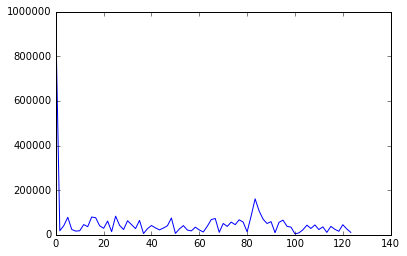

In [50]:
freq = np.fft.fftfreq(15*10, 1./250)
plt.plot(freq[0:75],result.values[0][0:75])

In [26]:
X_fft.values[0].shape,filt(np.fft.fftfreq(15*250, 1./250),0.4,50,np.fft.fftfreq(15*250, 1./250)).shape

((745,), (745,))

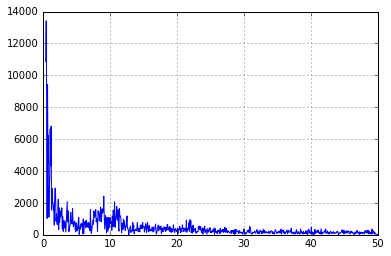

In [36]:
freq = np.fft.fftfreq(15*250, 1./250)
plt.plot(filt(freq,0.4,50,freq),np.abs(X_fft.values[31]))
plt.grid()
plt.show()